# VT1

This is the Script for the VT1 which shall fullfill the following tasks:


## Import of Packages

In [1]:
# Import of Packages
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

Importing Excel Data (General Format of Excel must be Headers followed by columns of Data)

In [2]:
# Reading the excel file
df = pd.read_excel("Sample.xlsx")
# print(df)

## Creating Scenarios
Calculation of Driftrate Mu and Standart Deviation Sigma


In [3]:
Year = np.array(df.iloc[:, 0])
Historic_Demand = np.array(df.iloc[:, 1])
Annual_Change = np.array(df.iloc[:, 2])
Percentage_Change = np.array(df.iloc[:, 3])
Outliner = np.array(df.iloc[:, 4])
Percentage_Change1 = np.array(df.iloc[:, 5])


mu = np.nanmean(Percentage_Change1)
print("Mu = ", mu)
sigma = np.nanstd(Percentage_Change1)
print("Simga = ", sigma)

Mu =  0.042754330256447565
Simga =  0.05813761525452841


Creating a Defined Number of Forecasts and Plots them

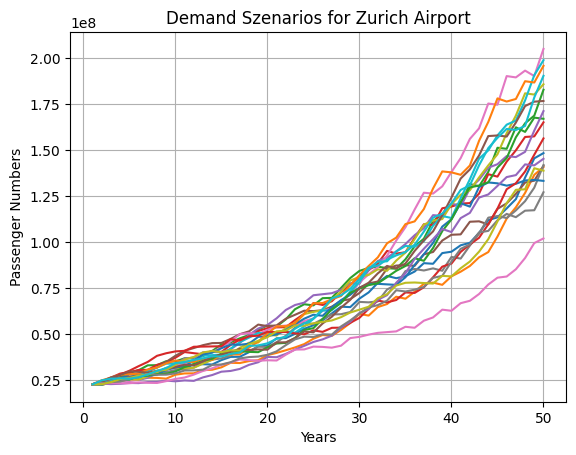

<Figure size 640x480 with 0 Axes>

In [4]:
# Required Parameters
# mu = 0.042754330256447565
# sigma = 0.05891802084811409
Dt0 = 22561132
dt = 1
# Time Horizon of Forecasts
Fth = 50
# Number of Forecasts
Forecasts = 20

import Functions as fn

Scenario = fn.Scenario_creation(mu, sigma, Dt0, dt, Fth, Forecasts)
fn.Scenario_plot(Scenario, Fth)
# Scenario

## NPV


Inputs for NPV Calculation

In [5]:
r_D = 0.03  # Revenues per Unit of Demand per Period
r_K = 0.03  # Revenues per Unit of Capacity per Period
co_K = 0.01  # Operational costs per unit of capacity per period
co_D = 0.004  # Operational cost per unit of demand per period
ci_K = 10  # Installation cost per unit of capacity
discount = 0.05  # Discount factor
EoS = 0.85  # EoS factor

D = Scenario

Creation of a Capacity Estimation

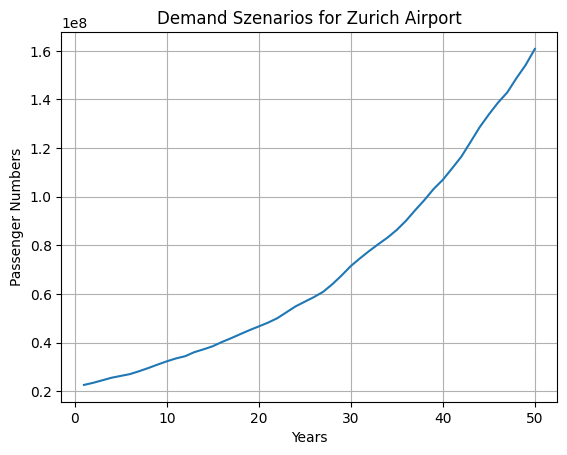

<Figure size 640x480 with 0 Axes>

In [6]:
# Calculate a Mean Scenario as Estimation Vector
meansvalues = np.mean(Scenario, axis=0)

# Creation of a time vector
t = np.arange(0, Fth, dt)

# Assinging the Mean Sceanrio as Capacity Vector K
K = meansvalues
fn.Scenario_plot(K, 50)

Calling the NPV Calculation Function

In [7]:
NPVs = fn.NPV_Calculation(D, K, t, r_D, r_K, co_K, co_D, ci_K, discount, EoS)
print(NPVs)

ENPV = np.mean(NPVs)
print("ENPV = ", ENPV)

[ 1742113.30522287  -662000.9249736   5631457.76721691  5431362.01944441
  5178937.52653856  4307866.12227062  5922532.69197513  1464444.18088971
  4232175.62000727  4837170.31097046  3293105.63248788  6042436.24982284
  2908739.42064351  3122688.07279269  -119155.14643671  3913399.34465361
 -2996256.6988363     25830.10445031  1816925.65977608  4461324.44854996]
ENPV =  3027754.785373311


## Plotting Historic Data (For Reference Only)
Plotting Excel Data (Specific to Sample Excel, all other Inputs need to be adjusted to it)

<Figure size 640x480 with 0 Axes>

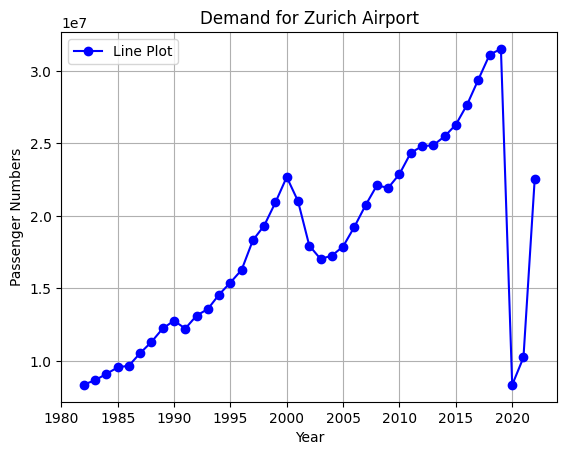

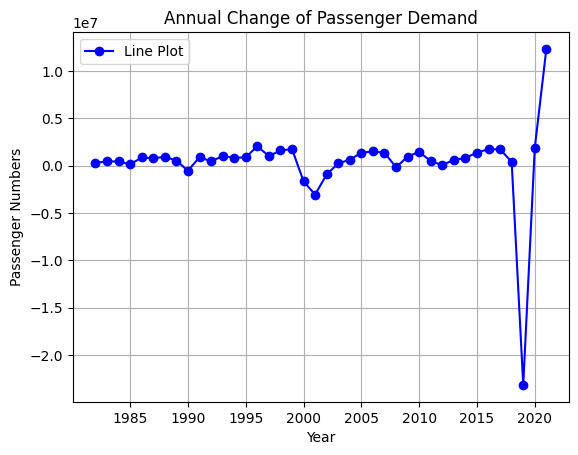

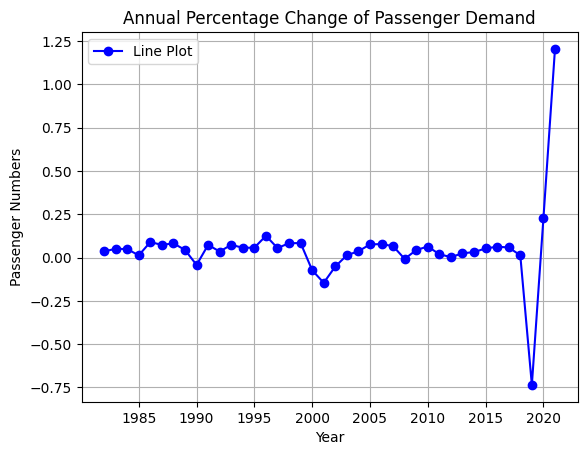

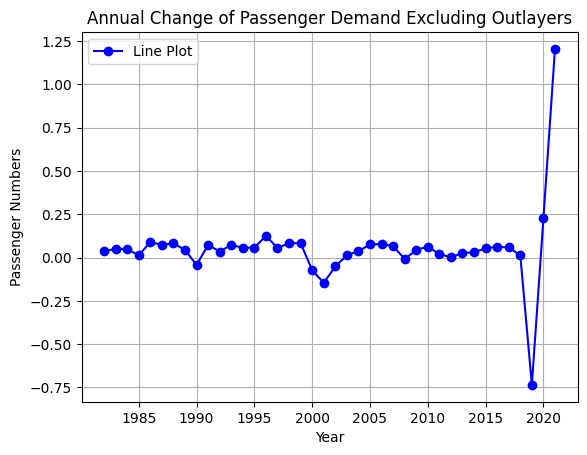

<Figure size 640x480 with 0 Axes>

In [8]:
# Plotting Excel Data (only specific to Test Excel, keys needs to be changed for other
# data)

plt.plot(
    Year,
    Historic_Demand,
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Demand for Zurich Airport")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    Year,
    Annual_Change,
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Change of Passenger Demand")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    Year,
    Percentage_Change,
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Percentage Change of Passenger Demand")
plt.legend()  # Display legend
plt.figure()

plt.plot(
    Year,
    Percentage_Change,
    label="Line Plot",
    color="blue",
    marker="o",
)
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Passenger Numbers")
plt.title("Annual Change of Passenger Demand Excluding Outlayers")
plt.legend()  # Display legend
plt.figure()